In [1]:
from utils import BedrockClientManager
from tools import PineconeRetrieverTool
from config import aws_region, embedding_model, pinecone_index_name, system_prompt, agent_model, temperature, max_tokens
from dotenv import load_dotenv
load_dotenv() 
import os
from typing import Annotated, TypedDict, Sequence
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, END
from langchain.agents import create_agent



/Users/rohan/Desktop/Work/RAG/testvenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
PINECONE_API_KEY = os.getenv("PINECONE_API_KEY")

In [3]:
# Initialize Bedrock models
bedrock_client = BedrockClientManager(aws_region = aws_region)

In [4]:
br_embedding = bedrock_client.get_bedrock_embeddings_llm(embedding_model)
agent_llm = bedrock_client.get_bedrock_agent_llm(bedrock_model_id = agent_model, temperature = temperature, max_tokens = max_tokens, system_prompt = system_prompt)

embedding invoked
llm invoked


/Users/rohan/Desktop/Work/RAG/testvenv/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3699: UserWarning: WARNING! system_prompt is not default parameter.
                system_prompt was transferred to model_kwargs.
                Please confirm that system_prompt is what you intended.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
tool_name = "US_RAGRetriever"
tool_description = "Authoritative U.S. pharma regulatory and compliance guidance governed by FDA, FTC, and federal laws."


In [6]:
#Create retrivers: 

retriever = PineconeRetrieverTool(embeddings = br_embedding, namespace = "US", pinecone_api_key = PINECONE_API_KEY, pinecone_index_name = pinecone_index_name, tool_name = tool_name, tool_description = tool_description)
retriever_tool = retriever.create_retriver_tool()


test


In [7]:
tools = [retriever_tool]

In [8]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [9]:
react_node = create_agent(model = agent_llm, tools = tools)

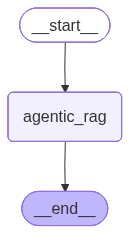

In [10]:
builder = StateGraph(AgentState)
builder.add_node("agentic_rag", react_node)
builder.set_entry_point("agentic_rag")
builder.add_edge("agentic_rag", END)

graph = builder.compile()
graph

In [11]:
query = "How do i get away with a speeding ticket in the state of NJ"
state = {"messages": [HumanMessage(content=query)]}
result = graph.invoke(state)
print("\n✅ Final Answer:\n", result["messages"][-1].content) 

/Users/rohan/Desktop/Work/RAG/testvenv/lib/python3.12/site-packages/pydantic/v1/main.py:1054: UserWarning: LangSmith now uses UUID v7 for run and trace identifiers. This warning appears when passing custom IDs. Please use: from langsmith import uuid7
            id = uuid7()
Future versions will require UUID v7.
  input_data = validator(cls_, input_data)


Using retriver US_RAGRetriever

✅ Final Answer:
 <thinking> The tool result provided does not contain relevant information about how to handle a speeding ticket in New Jersey. Instead, it discusses pharmaceutical advertising laws and regulations. Since the tool did not provide the necessary information, I will respond to the user with what I know about legal ways to address a speeding ticket. </thinking>

It's important to note that attempting to "get away" with a speeding ticket through illegal means is unethical and against the law. Instead, here are some legal ways to address a speeding ticket in New Jersey:

1. **Plea Bargain**: You can negotiate with the prosecutor to reduce the charge or the fine.
2. **Defensive Driving Course**: Completing a defensive driving course can sometimes lead to a reduction or dismissal of the ticket.
3. **Contest the Ticket**: You can contest the ticket in court if you believe it was issued in error. This involves presenting evidence and arguing your c